In [102]:
import pandas as pd
import numpy as np
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 

df=pd.read_csv(r'D:\data science projects\loan project\Loan Train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
df=df.drop('Loan_ID',axis=1)

C:\Users\anil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


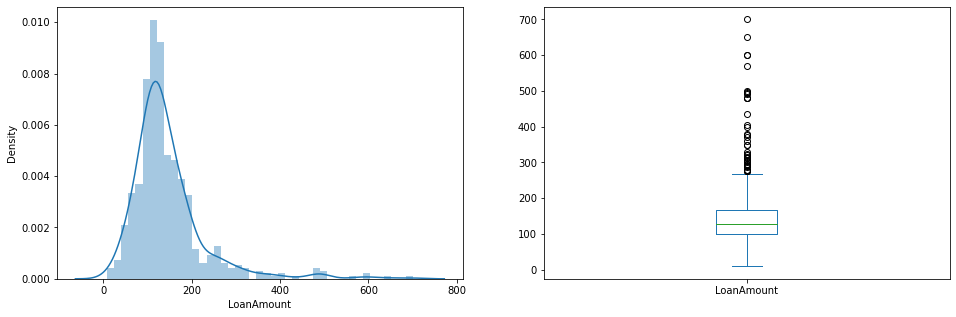

In [106]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['LoanAmount']) 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [107]:
print(df['LoanAmount'].median())
print(df['LoanAmount'].mean())

128.0
146.41216216216216


In [108]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Text(0.5, 0.98, '')

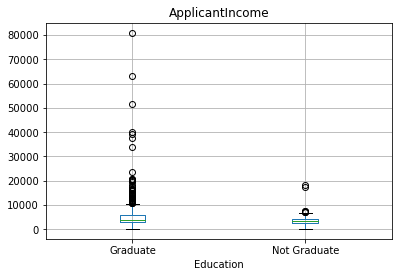

In [109]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

In [110]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [111]:
df=pd.get_dummies(df, columns = ['Gender','Education'])

In [112]:
df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate
0,No,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0,1,1,0
1,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,1,0
2,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0,1,1,0
3,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0,1,0,1
4,No,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,1,0,1,0
610,Yes,3+,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0,1,1,0
611,Yes,1,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0,1,1,0
612,Yes,2,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0,1,1,0


In [113]:
df=df.drop(['Gender_Female','Education_Not Graduate'],axis=1)

In [114]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [115]:
df['Property_Area']=df['Property_Area'].map({'Urban':2, 'Rural':0, 'Semiurban':1})

In [116]:
#df['Loan_Status'].replace('N', 0,inplace=True) 
#df['Loan_Status'].replace('Y', 1,inplace=True)

from sklearn import preprocessing
df['Married'] = preprocessing.LabelBinarizer().fit_transform(df['Married'])
df['Self_Employed'] = preprocessing.LabelBinarizer().fit_transform(df['Self_Employed'])
df['Loan_Status'] = preprocessing.LabelBinarizer().fit_transform(df['Loan_Status'])

In [117]:
df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Education_Graduate
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,1,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,1,1
3,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,1,0
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,0,1
610,1,3+,0,4106,0.0,40.000000,180.0,1.0,0,1,1,1
611,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,1,1
612,1,2,0,7583,0.0,187.000000,360.0,1.0,2,1,1,1


In [118]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [119]:
df['Dependents'].replace('3+', 3,inplace=True) 
df['Dependents'].replace('3+', 3,inplace=True) 

In [122]:
df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Education_Graduate
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,1,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,1,1
3,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,1,0
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,0,1
610,1,3,0,4106,0.0,40.000000,180.0,1.0,0,1,1,1
611,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,1,1
612,1,2,0,7583,0.0,187.000000,360.0,1.0,2,1,1,1


In [174]:
x = df.drop('Loan_Status',axis=1) 
y = df.Loan_Status 

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size =0.3)

In [196]:
y_train.value_counts()

1    293
0    136
Name: Loan_Status, dtype: int64

In [197]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [198]:
x_train=x_smote
y_train=y_smote

In [199]:
from sklearn.preprocessing import StandardScaler
x_train_scaler = StandardScaler().fit(x_train)
rescaled_x_train = x_train_scaler.transform(x_train)

In [212]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(rescaled_x_train, y_train)

LogisticRegression()

In [213]:
x_val_scaler = StandardScaler().fit(x_val)
rescaled_x_val = x_train_scaler.transform(x_val)

In [214]:
pred_val = model.predict(rescaled_x_val)

In [215]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_val,pred_val)

0.7081081081081081

In [216]:

confusion_matrix(y_val,pred_val)

array([[ 25,  31],
       [ 23, 106]], dtype=int64)